# Case Study II: R Source Code

**Authors: Trace Smith and Damon Resnick**

**Date: December 1, 2016**

*Various Coding Problems in R*

<br>

**R Packages utilized in this work**

In [16]:
dir <-"/Users/tracesmith/Desktop/Case-Study-II-share"
setwd(dir)
#Load R Packages
library(ggplot2)

## Question #1

**Create the following X matrix and print it from SAS, R, and Python.**

![](https://udacity-github-sync-content.s3.amazonaws.com/_attachments/26272/1479788865/Screen_Shot_2016-11-21_at_10.27.27_PM.png)

In [48]:
mymatrix <- matrix(c(4,1,2,5,0,1,1,3,8,2,5,2),nrow=3,ncol=4)
print(mymatrix)

     [,1] [,2] [,3] [,4]
[1,]    4    5    1    2
[2,]    1    0    3    5
[3,]    2    1    8    2


## Question #3

In [31]:
#Read in Orange dataset from R into data.frame
df <- data.frame(Orange)
knitr::kable(head(df))



|Tree |  age| circumference|
|:----|----:|-------------:|
|1    |  118|            30|
|1    |  484|            58|
|1    |  664|            87|
|1    | 1004|           115|
|1    | 1231|           120|
|1    | 1372|           142|

In [33]:
print("Summary of Orange dataset")
summary(df)#get summary of Orange dataset

#get structure of each columns
print("Structure of data.frame")
str(df$Tree)
str(df$age)
str(df$circumference)

[1] "Summary of Orange dataset"


 Tree       age         circumference  
 3:7   Min.   : 118.0   Min.   : 30.0  
 1:7   1st Qu.: 484.0   1st Qu.: 65.5  
 5:7   Median :1004.0   Median :115.0  
 2:7   Mean   : 922.1   Mean   :115.9  
 4:7   3rd Qu.:1372.0   3rd Qu.:161.5  
       Max.   :1582.0   Max.   :214.0  

[1] "Structure of data.frame"
 Ord.factor w/ 5 levels "3"<"1"<"5"<"2"<..: 2 2 2 2 2 2 2 4 4 4 ...
 num [1:35] 118 484 664 1004 1231 ...
 num [1:35] 30 58 87 115 120 142 145 33 69 111 ...


**Calculate the mean and the median of the trunk circumferences for different size of the trees. (Tree)**

In [19]:
#aggregate data.frame by Tree and compute mean circumference
circum.mean <- aggregate(df$circumference,by=list(df$Tree),FUN=mean)
colnames(circum.mean) <- c("Tree","Avg_Circumference")
knitr::kable(circum.mean)



|Tree | Avg_Circumference|
|:----|-----------------:|
|3    |          94.00000|
|1    |          99.57143|
|5    |         111.14286|
|2    |         135.28571|
|4    |         139.28571|

In [20]:
#aggregate data.frame by Tree and compute median circumference
circum.median <- aggregate(df$circumference,by=list(df$Tree),FUN=median)
colnames(circum.median) <- c("Tree","Med_Circumference")
knitr::kable(circum.median)



|Tree | Med_Circumference|
|:----|-----------------:|
|3    |               108|
|1    |               115|
|5    |               125|
|2    |               156|
|4    |               167|

**Make a scatter plot of the trunk circumferences against the age of the tree. Use different plotting symbols for different size of trees.**

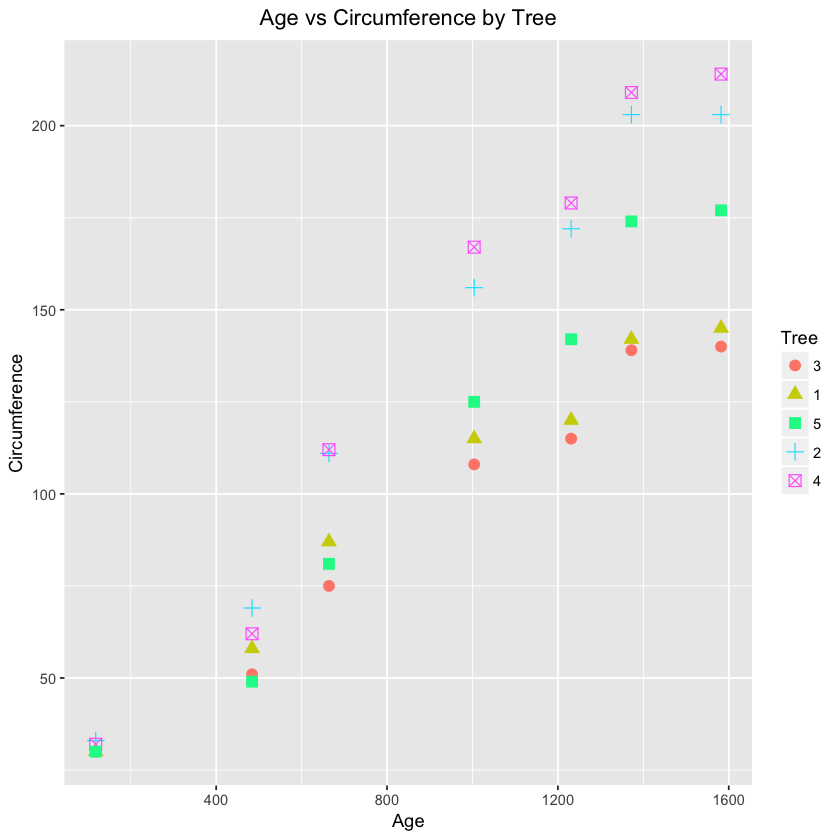

In [24]:
p <- ggplot(df) + geom_point(aes(y=circumference,x=age,colour=Tree, shape = Tree),size=3.0) + scale_colour_hue(l=80, c=150)
p + labs(title="Age vs Circumference by Tree",x="Age",y="Circumference",colour="Tree") +
    theme(plot.title = element_text(hjust = .5)) 

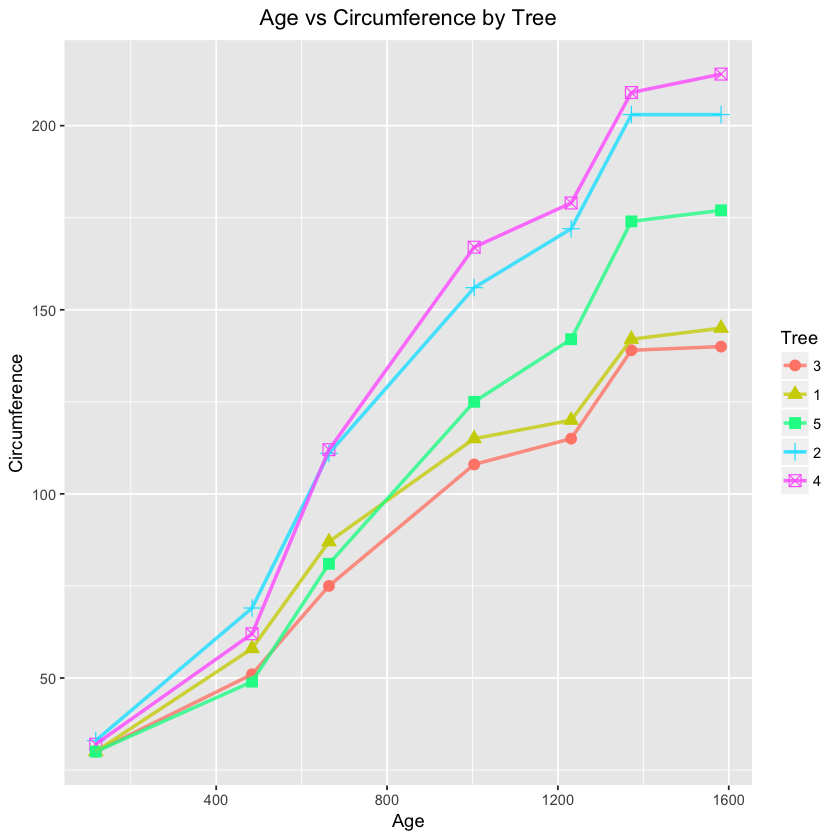

In [25]:
p <- ggplot(df,aes(y=circumference,x=age,colour=Tree)) + geom_point(aes(shape = Tree),size=3.0) +
  geom_line(size=1,alpha=0.8) + scale_colour_hue(l=80, c=150)
p + labs(title="Age vs Circumference by Tree",x="Age",y="Circumference",
         colour="Tree") +theme(plot.title = element_text(hjust = .5)) 

**Display the trunk circumferences on a comparative boxplot against tree. Order the boxplots in the increasing order of maximum diameter.**

In [26]:
circum.max <- aggregate(df$circumference,by=list(df$Tree),FUN=max)#aggregate for max circum
colnames(circum.max) <- c("Tree","Max Circum.") #rename columns
knitr::kable(circum.max) #knit table



|Tree | Max Circum.|
|:----|-----------:|
|3    |         140|
|1    |         145|
|5    |         177|
|2    |         203|
|4    |         214|

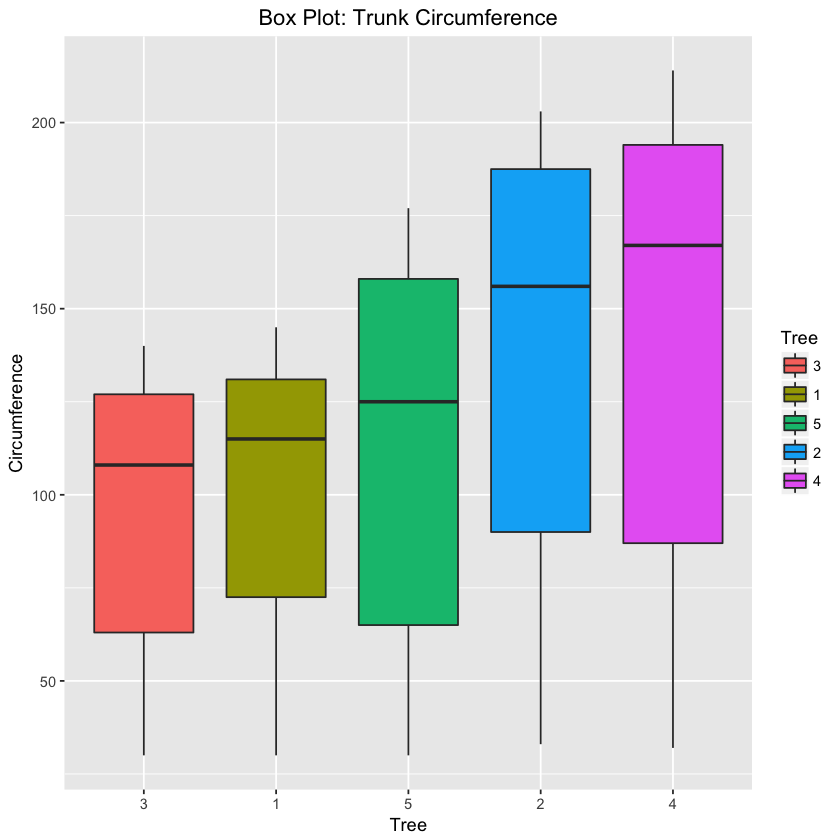

In [30]:
df$Tree <- factor(df$Tree,c("3","1","5","2","4")) #reorder the boxplot for max circum. by tree
p<-ggplot(df,aes(x=Tree,y=circumference))+ geom_boxplot(aes(fill=Tree))# ggplot: boxplot 
p + labs(title="Box Plot: Trunk Circumference", y="Circumference",x="Tree") + theme(plot.title=element_text(hjust=.5))

## Quesiton 4

**i.) First, download “Temp” data set. Find the difference between the  maximum and the minimum monthly average temperatures for each country and report/visualize top 20 countries with the maximum differences for the period since 1900.**

In [17]:
#Create new data.frame to join the two aggregated list
tempraw <- read.csv("./Data/Temp.csv",header=TRUE)
temp <- tempraw
knitr::kable(head(temp))



|Date       | Monthly.AverageTemp| Monthly.AverageTemp.Uncertainty|Country     |
|:----------|-------------------:|-------------------------------:|:-----------|
|1838-04-01 |              13.008|                           2.586|Afghanistan |
|1838-05-01 |                  NA|                              NA|Afghanistan |
|1838-06-01 |              23.950|                           2.510|Afghanistan |
|1838-07-01 |              26.877|                           2.883|Afghanistan |
|1838-08-01 |              24.938|                           2.992|Afghanistan |
|1838-09-01 |              18.981|                           2.538|Afghanistan |

In [18]:
#Preprocessing the Data:

#Need to make Date column into a character in order to use grepl to extract out other date format
temp$Date <- as.character(temp$Date)

#Deletes all the dates below 1900 because all of those dates are in a different format with "-" and not "/"
temp <- temp[!grepl("-",temp$Date),]

# Remove any columns with "NA" just to be careful
temp1 <- temp[!(is.na(temp$Date)),]

#Make Country column a character
temp1$Country <- as.character(temp1$Country)

#return all the rows (i.e. margin=1) with NA 
row.with.na <- apply(temp, 1, function(x) {any(is.na(x))})

#Sum all of the rows containing NA
sprintf("Number of Rows Deleted that contained NA's: %s ",sum(row.with.na))

#Remove the Rows with NA's
temp1 <- temp[!row.with.na,]

[1] "Number of Rows Deleted that contained NA's: 1049 "

In [19]:
#Aggregate for max and min average temps
temp.max <- aggregate(temp1["Monthly.AverageTemp"],by=temp1["Country"],FUN=max)
temp.min <- aggregate(temp1["Monthly.AverageTemp"],by=temp1["Country"],FUN=min,na.rm=TRUE)

#Create new data.frame to join the two aggregated list
data <- data.frame(temp.max,temp.min)

#Drop extra Country column
data$Country.1 <- NULL

#Rename column
colnames(data)<-c("Country","Max Avg. Temp","Min Avg. Temp")

#Take difference between max and min avg. temp columns
data$Diff <- data$'Max Avg. Temp' - data$'Min Avg. Temp'

#Sort the dataframe by decreasing Diff
data <-data[order(data$Diff,data$Country,decreasing = TRUE),]
knitr::kable(head(data,10))



|    |Country      | Max Avg. Temp| Min Avg. Temp|   Diff|
|:---|:------------|-------------:|-------------:|------:|
|115 |Kazakhstan   |        25.562|       -23.601| 49.163|
|144 |Mongolia     |        20.716|       -27.294| 48.010|
|180 |Russia       |        16.893|       -29.789| 46.682|
|39  |Canada       |        14.796|       -28.736| 43.532|
|234 |Uzbekistan   |        30.375|       -12.323| 42.698|
|225 |Turkmenistan |        32.136|        -8.443| 40.579|
|22  |Belarus      |        22.811|       -16.527| 39.338|
|75  |Finland      |        18.967|       -20.101| 39.068|
|68  |Estonia      |        22.332|       -16.483| 38.815|
|228 |Ukraine      |        23.936|       -14.724| 38.660|

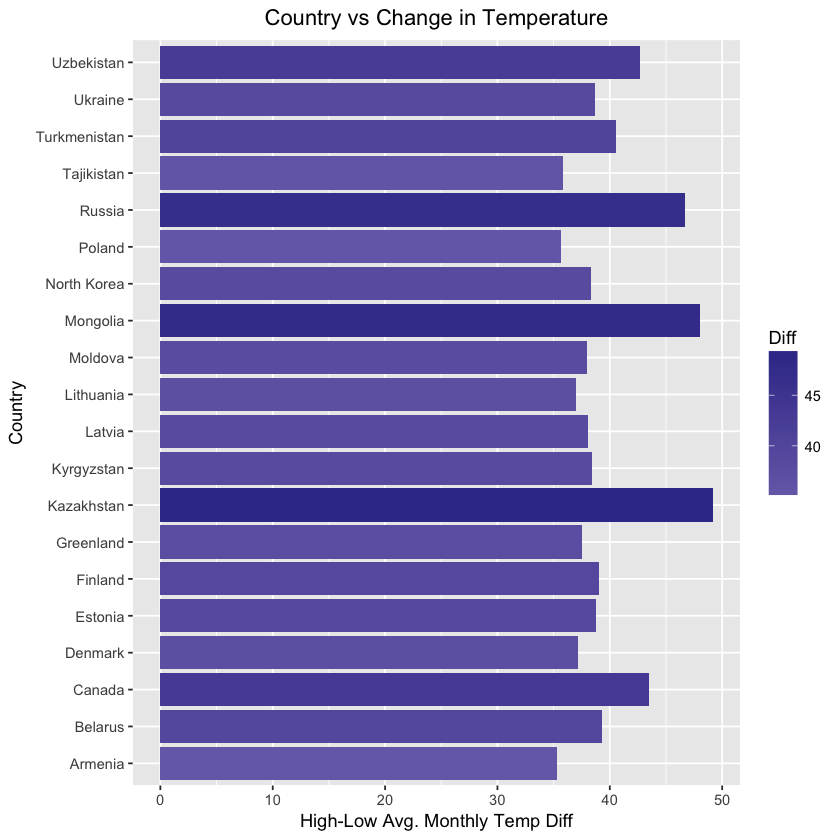

In [145]:
#Subset the data to only take the first 20 columns with highest temp diff.
data.sub <- data[1:20,] 

#plot Country vs Temp Diff
p<- ggplot(data.sub,aes(Country,Diff,fill=Diff))+geom_bar(stat='identity') + coord_flip() + scale_fill_gradient2("Diff")
p + labs(title="Country vs Change in Temperature", x="Country",y = "High-Low Avg. Monthly Temp Diff") +
theme(plot.title=element_text(hjust=0.5))

**(ii) Select a subset of data called 'UStemp' where US land temperatures from 01/01/1990 in Temp data. Use UStemp dataset to answer the followings.**

In [21]:
#subset to data for only country = "U.S."
temp.usa <- subset(temp1,temp1$Country == "United States")
knitr::kable(head(temp.usa))



|       |Date   | Monthly.AverageTemp| Monthly.AverageTemp.Uncertainty|Country       |
|:------|:------|-------------------:|-------------------------------:|:-------------|
|553218 |1/1/00 |              -2.573|                           0.443|United States |
|553219 |2/1/00 |              -2.912|                           0.533|United States |
|553220 |3/1/00 |               2.636|                           0.358|United States |
|553221 |4/1/00 |               8.091|                           0.263|United States |
|553222 |5/1/00 |              14.317|                           0.239|United States |
|553223 |6/1/00 |              19.280|                           0.379|United States |

In [22]:
#Find the row in which date equals 1/1/90
which(temp.usa$Date == "1/1/90")
#delete all of the obs with date before 1990
temp.usa <- temp.usa[-c(1:1080),]
#change the Date column to date object
temp.usa$Date <- as.Date(temp.usa$Date, format="%m/%d/%y")

[1] 1081

**a) Create a new column to display the monthly average land temperatures in Fahrenheit (°F).**


In [23]:
#Convert Temp from celsius to fahrenheit:
temp.usa$Temp_F <- ((temp.usa$Monthly.AverageTemp * (9/5)) + 32)
knitr::kable(head(temp.usa["Temp_F"]))



|       |  Temp_F|
|:------|-------:|
|554298 | 29.9786|
|554299 | 28.8554|
|554300 | 40.0370|
|554301 | 48.8840|
|554302 | 56.7896|
|554303 | 67.6040|

**b) Calculate the average land temperature by year and plot it. The original file has the average land temperature by month. **


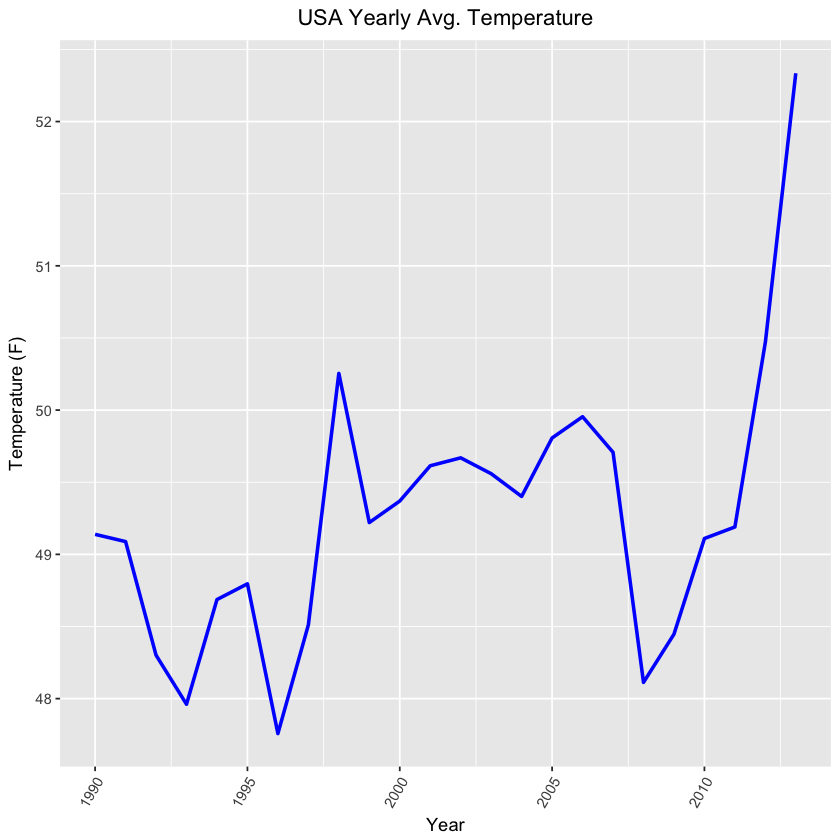

In [24]:
#Average Land Temperatue by Year:
temp.usa$year <- substr(temp.usa$Date,1,4)
df.temp.usa <- do.call(data.frame,aggregate(Temp_F ~ year,data=temp.usa,FUN=mean))
df.temp.usa$year <- as.numeric(as.character(df.temp.usa$year))
#str(df.temp.usa$year)

#plot USA yearly avgerage temp
p <- ggplot(df.temp.usa) + geom_line(aes(x=year,y=Temp_F),stat='identity',lwd=1.0,colour="blue") 
p + labs(title="USA Yearly Avg. Temperature" , x="Year", y="Temperature (F)") + 
  theme(axis.text.x=element_text(angle=60,hjust=1),legend.position = "none") + theme(plot.title=element_text(hjust=0.5))

**c) Calculate the one year difference of average land temperature by year and provide the maximum difference (value) with corresponding two years.**

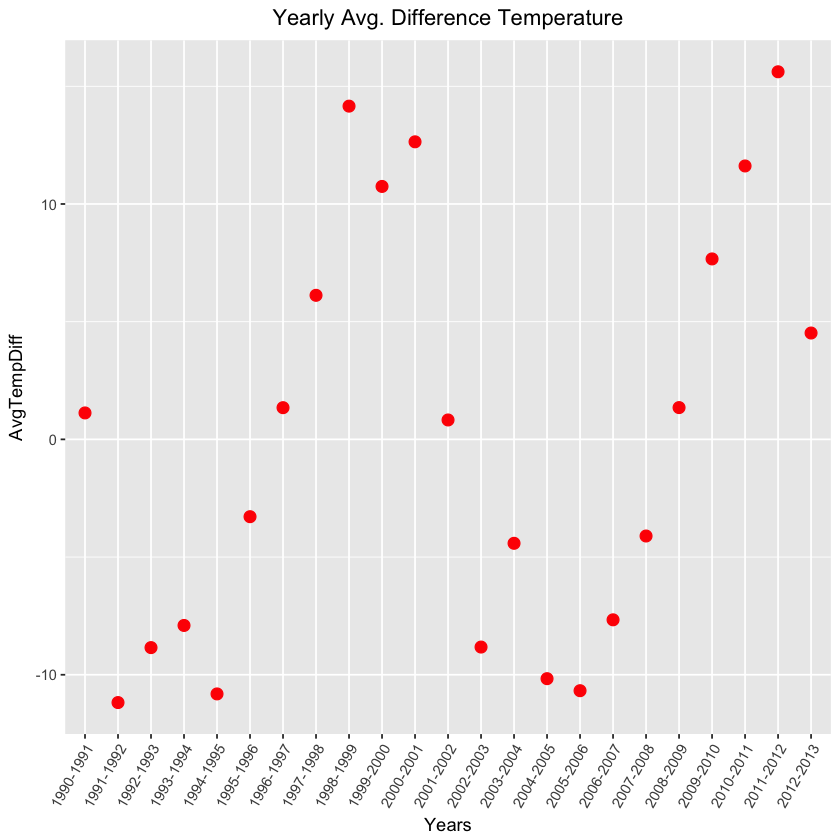

In [25]:
temp.usa.year.diff <- temp.usa$Temp_F[1:23]-temp.usa$Temp_F[2:24]

temp.usa.year.diff.year<- c("1990-1991", "1991-1992", "1992-1993", "1993-1994", 
                            "1994-1995", "1995-1996", "1996-1997", "1997-1998", "1998-1999", "1999-2000", "2000-2001", 
                            "2001-2002", "2002-2003", "2003-2004", "2004-2005", "2005-2006", "2006-2007", "2007-2008", 
                            "2008-2009", "2009-2010", "2010-2011", "2011-2012", "2012-2013")

temp.usa.ydiff <- data.frame(temp.usa.year.diff.year, temp.usa.year.diff)
colnames(temp.usa.ydiff) <- c("Years","AvgTempDiff")

p <- ggplot(temp.usa.ydiff) + geom_point(aes(x=Years,y=AvgTempDiff), size = 3, colour="Red")
p + labs(title="Yearly Avg. Difference Temperature") + 
  theme(axis.text.x=element_text(angle=60,hjust=1),legend.position = "none") +
  theme(plot.title=element_text(hjust=0.5))


**(iii) Download 'CityTemp' data set. Find the difference between the maximum and the minimum temperatures for each major city and report/visualize top 20 cities with maximum differences for the period since 1900.**  

In [26]:
citytempraw <- read.csv("./Data/CityTemp.csv",header=TRUE)
citytemp <- citytempraw
knitr::kable(head(citytemp))



|Date       | Monthly.AverageTemp| Monthly.AverageTemp.Uncertainty|City        |Country  |Latitude |Longitude |
|:----------|-------------------:|-------------------------------:|:-----------|:--------|:--------|:---------|
|1850-01-01 |              15.986|                           1.537|Addis Abeba |Ethiopia |8.84N    |38.11E    |
|1850-02-01 |              18.345|                           1.527|Addis Abeba |Ethiopia |8.84N    |38.11E    |
|1850-03-01 |              18.632|                           2.162|Addis Abeba |Ethiopia |8.84N    |38.11E    |
|1850-04-01 |              18.154|                           1.693|Addis Abeba |Ethiopia |8.84N    |38.11E    |
|1850-05-01 |              17.480|                           1.237|Addis Abeba |Ethiopia |8.84N    |38.11E    |
|1850-06-01 |              17.183|                           1.252|Addis Abeba |Ethiopia |8.84N    |38.11E    |

In [27]:
#Preprocessing the Data:

#Convert the Date column into a character in order to use grepl to extract out other date format
citytemp$Date <- as.character(citytemp$Date)
#Delete all dates below 1900 because all of those dates are in a different format with "-" and not "/"
citytemp <- citytemp[!grepl("-",citytemp$Date),]

row.with.na <- apply(citytemp,1, function(x){any(is.na(x))})
sprintf("Number of rows deleted with NA's: %s",sum(row.with.na))
citytemp1<-citytemp[!row.with.na,]

[1] "Number of rows deleted with NA's: 92"

In [28]:
#Identify which columns are strings
cols = c(4,5,6,7);    
# convert these columns to characters using the apply function
citytemp1[,cols] = apply(citytemp1[,cols], 2, function(x) as.character(x))
#test if worked correctly
str(citytemp1$City)

 chr [1:135043] "Addis Abeba" "Addis Abeba" "Addis Abeba" ...


In [29]:
#Aggregate for max and min average temps
citytemp.max <- aggregate(citytemp1["Monthly.AverageTemp"],by=citytemp1["City"],FUN=max)
citytemp.min <- aggregate(citytemp1["Monthly.AverageTemp"],by=citytemp1["City"],FUN=min,na.rm=TRUE)

#Create new data.frame to join the two aggregated list
citydata <- data.frame(citytemp.max,citytemp.min)

#Drop extra Country column
citydata$City.1 <- NULL

#Rename column
colnames(citydata)<-c("City","Max Avg. Temp","Min Avg. Temp")

#Take difference between max and min avg. temp columns
citydata$Diff <- citydata$'Max Avg. Temp' - citydata$'Min Avg. Temp'

#Sort the dataframe by decreasing Diff
citydata <-citydata[order(citydata$Diff,citydata$City,decreasing = TRUE),]
knitr::kable(head(citydata, 10))




|   |City             | Max Avg. Temp| Min Avg. Temp|   Diff|
|:--|:----------------|-------------:|-------------:|------:|
|34 |Harbin           |        26.509|       -26.772| 53.281|
|19 |Changchun        |        26.572|       -23.272| 49.844|
|65 |Moscow           |        24.580|       -19.376| 43.956|
|85 |Shenyang         |        26.010|       -17.035| 43.045|
|64 |Montreal         |        23.059|       -18.363| 41.422|
|48 |Kiev             |        24.593|       -16.191| 40.784|
|79 |Saint Petersburg |        21.921|       -18.589| 40.510|
|96 |Toronto          |        23.181|       -15.502| 38.683|
|92 |Taiyuan          |        24.718|       -13.116| 37.834|
|94 |Tianjin          |        28.936|        -8.017| 36.953|

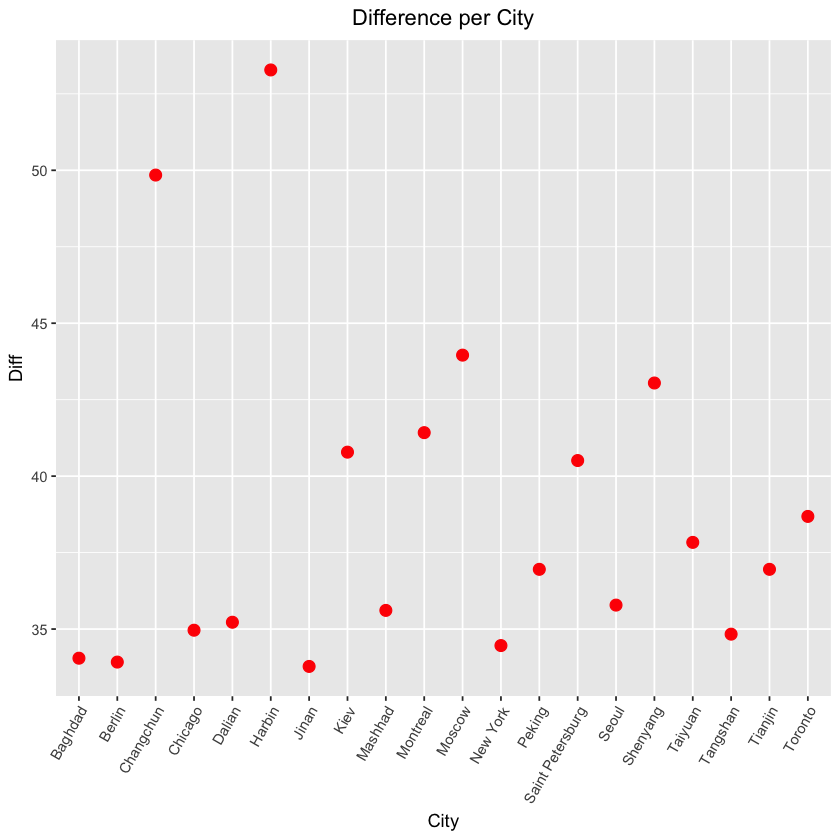

In [30]:
#Subset the data to only take the first 20 columns with highest temp diff.
citydata.sub <- citydata[1:20,]

p <- ggplot(citydata.sub) + geom_point(aes(x=City,y=Diff), size = 3, colour="Red")
p + labs(title="Difference per City") +
  theme(axis.text.x=element_text(angle=60,hjust=1),legend.position = "none") + theme(plot.title=element_text(hjust=0.5))

**(iv) Compare the two graphs in (i) and (iii)**

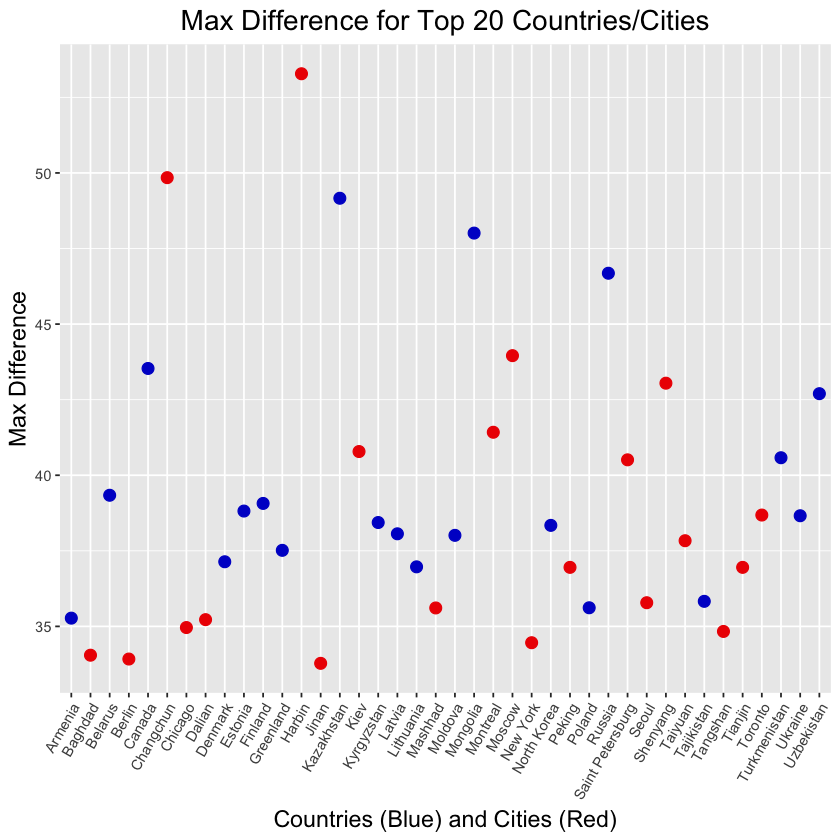

In [31]:
p4 <- ggplot() + geom_point(data=data.sub, aes(x=data.sub$Country, y=data.sub$Diff), 
        color='Blue3', size = 3) + geom_point(data=citydata.sub, 
            aes(x=citydata.sub$City, y=citydata.sub$Diff), color='Red2', size = 3)
p4 + labs(title="Max Difference for Top 20 Countries/Cities", x = "Countries (Blue) and Cities (Red)",
          y = "Max Difference") + theme(title=element_text(size=14), axis.title=element_text(size=14), 
            axis.text.x=element_text(angle=60,hjust=1),legend.position = "none") + theme(plot.title=element_text(hjust=0.5))

In [146]:
hilow <- function(df,x){
    p <- ggplot(data=df, aes(x,Diff,fill=Diff)) + geom_bar(stat='identity') + coord_cartesian(ylim=c(30,50)) + scale_fill_gradient(low = "blue", high = "red")
    p + labs(title="High-Low Average Temp Difference", 
            x="Country",y="Average Temperature Difference") +  
    theme(axis.text.x=element_text(angle=60,hjust=1)) + theme(plot.title=element_text(hjust=0.5)) 
}


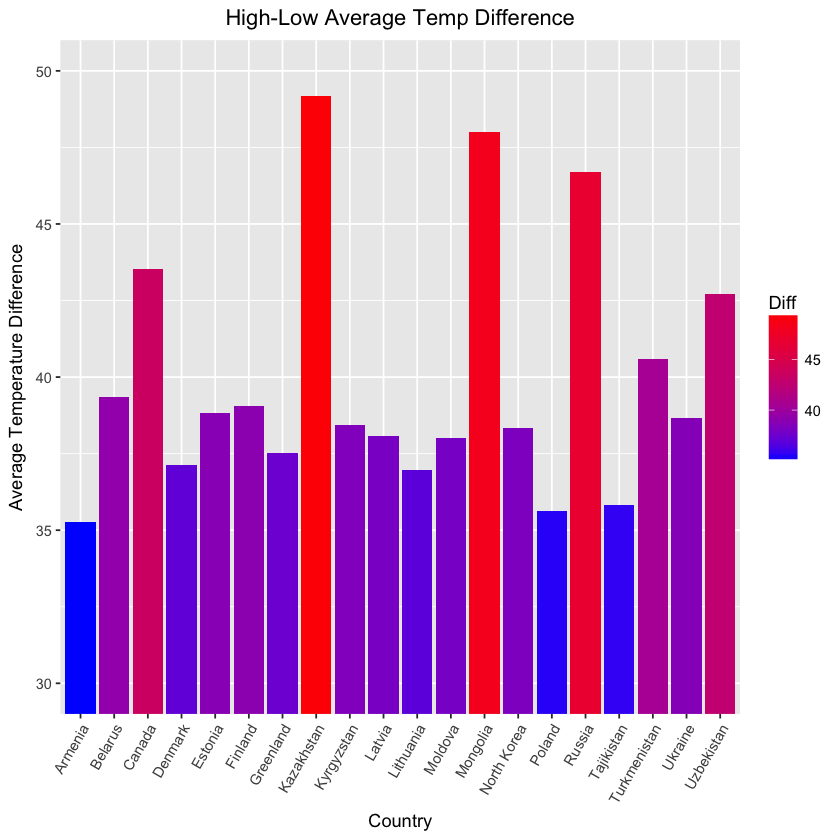

In [147]:
# Difference in Average Temp Per Country
country_var <- data.sub$Country
hilow(data.sub,country_var)

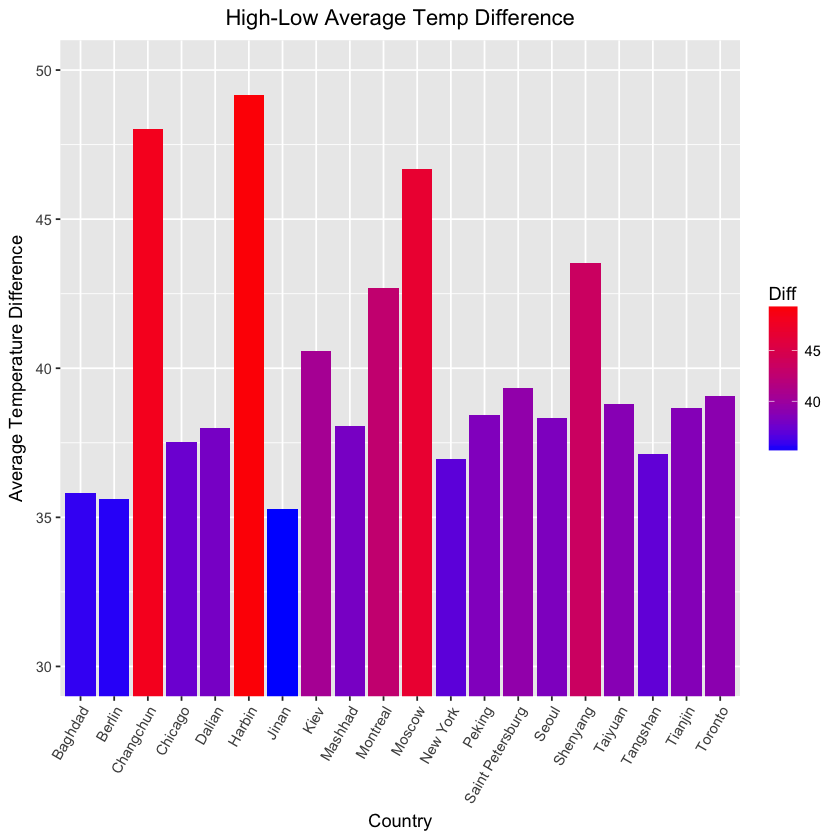

In [148]:
# Difference in Average Temp Per Country
city_var <- citydata.sub$City
hilow(data.sub,city_var)